In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
# hack to get the path right
import sys
sys.path.append('..')

from ztf_maf.slicers import HealpixZTFSlicer

In [7]:
slicer = HealpixZTFSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec')
#slicer = slicers.OpsimFieldSlicer()

metricList = []

#    metric = metrics.MeanMetric(col='seeing')
metric = metrics.CountMetric(col='fieldRA')
#    metric = metrics.MinMetric(col='seeing')
#    metric = metrics.Coaddm5Metric(m5Col='maglim')

metricList.append(metric)


filters = ['r','g']
programs = [1,2,3]

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

   
bDict={}
for i,metric in enumerate(metricList):

#    for j, filt in enumerate(filters):
#        sqlconstraint = "filter = '%s'"%(filt)
    for j, prog in enumerate(programs):
        sqlconstraint = "propID = '%s'"%(prog)

        bDict[sqlconstraint] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                              summaryMetrics=summaryMetrics)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint propID = '3'
Found 2253 visits
Running:  ["propID = '3'"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '1'
Found 3201 visits
Running:  ["propID = '1'"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '2'
Found 1747 visits
Running:  ["propID = '2'"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with propID = '3' constraint now.
Plotting complete.
Plotting figures with propID = '1' constraint now.
Plotting complete.
Plotting figures with propID = '2' constraint now.
Plotting complete.


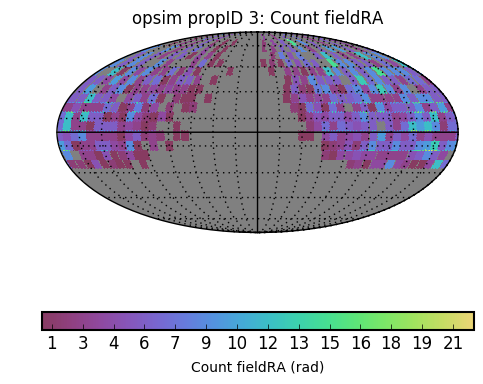

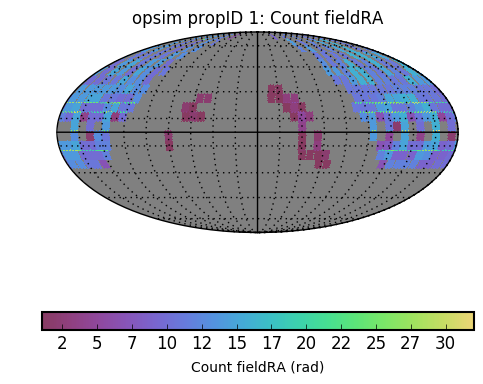

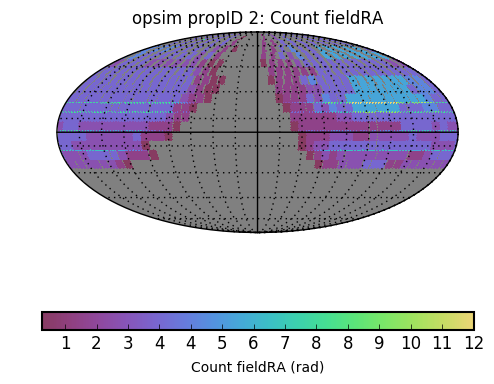

In [8]:
outDir = 'ZTF_test'
ztfDB = db.OpsimDatabase('../sims/long_upgraded_slews_v2.db',
                        defaultdbTables={'Summary':['Summary','obsHistID']})
ztfDB.raColName = 'fieldRA'
ztfDB.decColName = 'fieldDec'

resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, ztfDB, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [9]:
for key in sorted(bDict):
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print key, bDict[key].metric.name, bDict[key].summaryValues

propID = '1' Count fieldRA {'25th%ile': 10.0, 'Rms': 4.7572659372086044, '75th%ile': 14.0, 'Min': 1.0, 'Max': 32.0, 'Median': 11.0, 'Mean': 10.777580071174377}
propID = '2' Count fieldRA {'25th%ile': 3.0, 'Rms': 1.3830521134241607, '75th%ile': 4.0, 'Min': 1.0, 'Max': 12.0, 'Median': 4.0, 'Mean': 3.5548619239606363}
propID = '3' Count fieldRA {'25th%ile': 3.0, 'Rms': 3.1580250325041601, '75th%ile': 7.0, 'Min': 1.0, 'Max': 22.0, 'Median': 4.0, 'Mean': 5.0460118274917063}
